# Logistic regression
The goal of logistic regression is to classify data using a trained model. Logistic regression is a simple algorithm that does not require a lot of computational power (in contrast to techniques like support vector machines) whilest often perform as well (or even better) than more complex models. Besides just assigning a class, it also calculates the probabilities allowing us to see how confident the model is in a decission.

The goals of this exercise are
* Correctly training and tuning a logistic regression classifier
* Performing classification via logistic regression
* Perform feature engineering
* Interpretting the different performance metrics like accuracy, recall, precision, f1-score, ROC
* Know when you're dealing with under- and overfitting and the ability to make adaptions regarding this


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt                        # To create plots
import numpy as np                                     # To perform calculations quickly
import pandas as pd                                    # To load in and manipulate data
from sklearn.linear_model import LogisticRegression    # Linear model
from sklearn.model_selection import train_test_split   # Split up the data in a train and test set
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import roc_curve,auc
import seaborn as sns


## Breastcancer dataset

https://www.kaggle.com/pranaykankariya/breastcancer-dataset

Target column: diagnosis (Malign or Benign)

In [3]:
# Read in the data
data = pd.read_csv("data/breast_cancer.csv")
# Take a look at the first rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Summarize the dataset
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<Axes: xlabel='diagnosis', ylabel='count'>

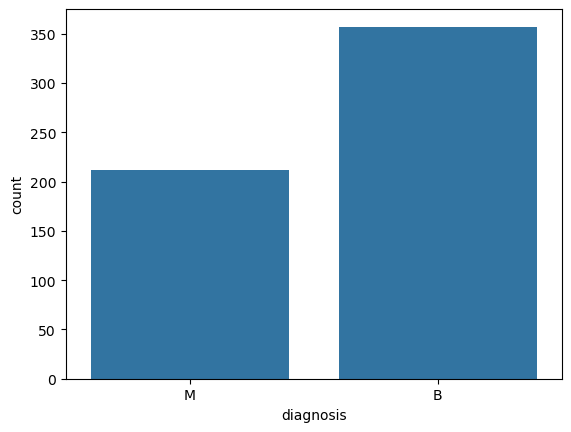

In [5]:
# Create a countplot to determine if the classes are balanced
# Use sns.countplot(data=df_cancer,x='column_of_interest')
sns.countplot(data=data,x="diagnosis")

In [6]:
# Remove uninformative columns (look at the summary and first rows to determine which columns you should remove)
data.drop(["id","Unnamed: 32"]
           ,axis=1,inplace=True)

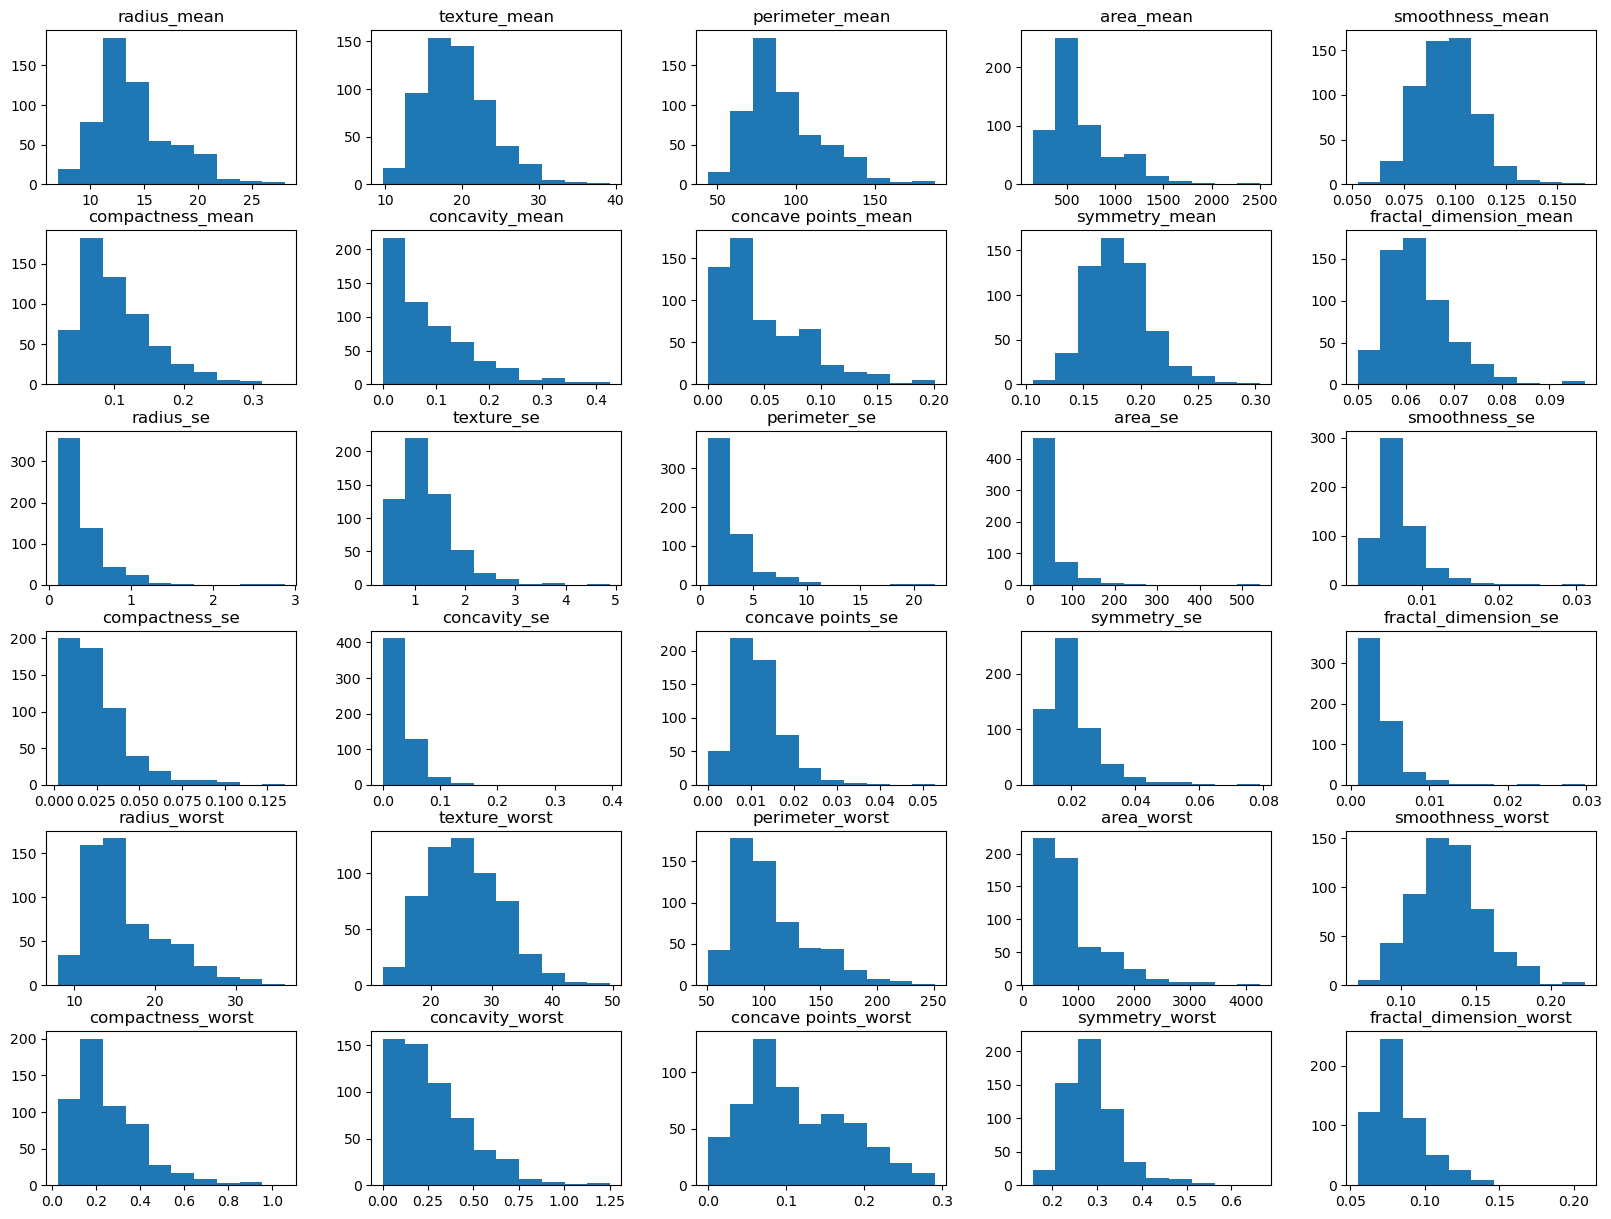

In [7]:
# Create a histogram plot of the different features
# This can be done using the pandas hist function.
# => my_df.hist()
# To increase the size of the figure, you can pass a figsize tupple. (20,15) works good. You can also hide the grid
# with the option "grid=False"
# => my_df.hist(figsize=(20,15),grid=False)

#To hide the plot information you can assign it to a variable, or add a ";" at the end (other options exist)
# => plot = my_df.hist(figsize=(20,15),grid=False)         or       my_df.hist(figsize=(20,15),grid=False);

data.hist(figsize=(20,15),grid=False);

In [8]:
# Split data into features and targets (or X, y depending on your preference)
X=data.drop(["diagnosis"],axis=1)
y=data.diagnosis


In [9]:
# Split data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
# Scale the data, use a scaler. You can base your choice on the histogrammes above, or by just trying them out 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Initialize a logistic regression model, fit the data. Start with a C-value of 1
model= LogisticRegression(C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

### Model evaluation
In the next section we will evaluate our model using different metrics

In [12]:
# Check if you have over- or underfitting of your model by comparing the score of the training and test set
print("Accuracy on the training set:",model.score(X_train,y_train))
print("Accuracy on the test set:",model.score(X_test,y_test))
print("="*80)

# Predict values for the test set
y_pred=model.predict(X_test)

# Look at the confusion matrix, what do the different values mean in this case?
# Hint: if you don't know the syntax/meaning for a specific funtion, you can always look this up
# in jupyter notebook by executing "?function_name"
print("Confusion matrix:\n",confusion_matrix(y_true=y_test,y_pred=y_pred))
print("="*80)

# Show the accuracy, recall, precision and f1-score for the test set
# Note, sometimes you need to supply a positive label (if not working with 0 and 1)
# supply this with "pos_label='label'", in this case, the malign samples are the positives
print("Long way:")
print(" Accuracy:",accuracy_score(y_test,y_pred))
print("   Recall:",recall_score(y_test,y_pred,pos_label="M"))
print("Precision:",precision_score(y_test,y_pred,pos_label="M"))
print(" F1-score:",f1_score(y_test,y_pred,pos_label="M"))
print("="*80)
print("Short way:")
print(classification_report(y_test,y_pred))
print("="*80)

Accuracy on the training set: 0.9899497487437185
Accuracy on the test set: 0.9766081871345029
Confusion matrix:
 [[107   1]
 [  3  60]]
Long way:
 Accuracy: 0.9766081871345029
   Recall: 0.9523809523809523
Precision: 0.9836065573770492
 F1-score: 0.9677419354838709
Short way:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98       108
           M       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



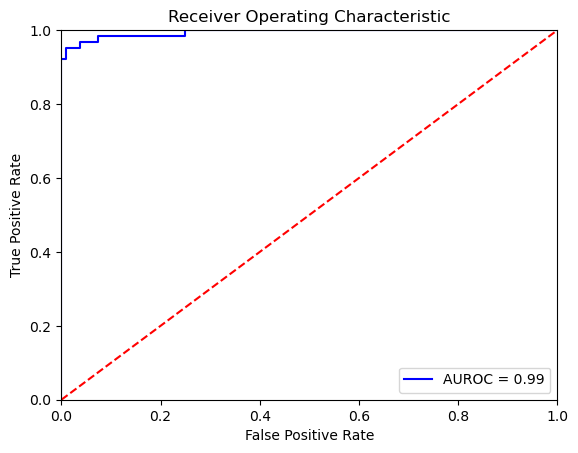

In [13]:
# Make a roc curve, also show the AUROC
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label="M")
roc_auc = auc(fpr, tpr)

# Plot the roc curce
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUROC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Try some different C-values for the model. E.g. 0.0001 and 1000
What do you see in the metrics? what does this mean?

***
- C=0.0001
                    precision    recall  f1-score   support
                 B       0.64      1.00      0.78       108
                 M       1.00      0.03      0.06        63
          accuracy                           0.64       171
         macro avg       0.82      0.52      0.42       171
      weighted avg       0.77      0.64      0.52       171
    - Train set:
        - The training set does not do well. The accuracy is quite low and the model basically says: all samples are benign
    - Test set:
        - You get a low accuracy (64%) and when looking into more detail, we see that almost all malign cancers are actually classified as benign. This results in a low recall value for the malign samples. However, the few samples that are classified correctly are also always correct. So this results in a high precision. This is also seen in the F1-score since this uses both recall and precision metrics. The f1-score is very low.
        - On the other hand, for the benign samples there is a high recall, since benign samples are always correctly classified, however the precision is low since there are also a lot of false benign samples that are actually malign. The F1-score is still not good.
    - We can conclude that this model is underfitted, since both train and test set are not doing well.
***
- C=1000
                    precision    recall  f1-score   support
                 B       0.96      0.94      0.95       10
                 M       0.89      0.94      0.91        63
          accuracy                           0.94       171
         macro avg       0.93      0.94      0.93       171
      weighted avg       0.94      0.94      0.94       171
    - Train set:
        - The accuracy of the training set is 100% meaning every single one of our samples could be correctly classified
    - Test set:
        - The accuracy of the test set is 93% which is still high, however there is a big difference between 93% and 100%. If we look at the precision of the malign samples, we see that this is only 89%. This is the result of multiple benign samples being wrongly classified as malign samples.
    - We can conclude that this model is overfitted, since our training set has an accuracy of 100% but this is not reflected in our test set. This means our model picks up noise from the training data.

## Wine dataset
https://archive.ics.uci.edu/ml/datasets/Wine
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

The feature of interest is "cultivar"

In [16]:
# Read in the data
data = pd.read_csv("data/wine.csv")
# Take a look at the first rows
data.head()

,cultivar,alcohol,malic_acid,ash,alcalinity,magnesium,phenols_total,phenols_flavanoids,phenols_nonflavanoids,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
# Show a summary of the data
data.describe()

,cultivar,alcohol,malic_acid,ash,alcalinity,magnesium,phenols_total,phenols_flavanoids,phenols_nonflavanoids,proanthocyanins,color_intensity,hue,OD280/OD315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [18]:
# split into features and targets (X and y)
X = data.drop("cultivar",axis=1)
y = data.cultivar

In [19]:
# split into train and test set, keep about 20% of the data to test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
# scale/normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test) 

In [21]:
# Create a model
model = LogisticRegression(C=0.005,max_iter=10000)
model.fit(X_train_scaled,y_train)

# Check if you have over- or underfitting of your model by comparing the score of the training and test set
print("Accuracy on the training set:",model.score(X_train_scaled,y_train))
print("Accuracy on the test set:",model.score(X_test_scaled,y_test))

print("="*80)

# Predict values for the test set
y_pred=model.predict(X_test_scaled)

# Look at the confusion matrix, what do the different values mean in this case
print("Confusion matrix:\n",confusion_matrix(y_true=y_test,y_pred=y_pred))

print("="*80)

# Show the accuracy, recall, precision and f1-score for the test set
# Note, since we have multiple classes, we have to provide an average parameter to recall, precision and f1-score
# Using average=None will result in the scores for all classes. To know which classes correspond to which values,
# you can take a look at model.classes_

# Function to quickly display the scores per class
def score_per_class(scores,model=model):
    return ", ".join([f"{x}: {round(y,2)}" for (x,y) in zip(model.classes_,scores)])

print("Long way:")
print(" Accuracy:",accuracy_score(y_test,y_pred))
print("   Recall:",score_per_class(recall_score(y_test,y_pred,average=None)))
print("Precision:",score_per_class(precision_score(y_test,y_pred,average=None)))
print(" F1-score:",score_per_class(f1_score(y_test,y_pred,average=None)))

print("="*80)

print("Short way:")
print(classification_report(y_test,y_pred))

print("="*80)

Accuracy on the training set: 0.9859154929577465
Accuracy on the test set: 0.9444444444444444
Confusion matrix:
 [[13  1  0]
 [ 0 14  1]
 [ 0  0  7]]
Long way:
 Accuracy: 0.9444444444444444
   Recall: 1: 0.93, 2: 0.93, 3: 1.0
Precision: 1: 1.0, 2: 0.93, 3: 0.88
 F1-score: 1: 0.96, 2: 0.93, 3: 0.93
Short way:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      0.93      0.93        15
           3       0.88      1.00      0.93         7

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

